In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)


## DataProcess

In [2]:
data_dir = 'E:\Work_DatPT\Study\Master\dataset'
df_capec = pd.read_csv(data_dir + '/data_capec_multilabel.csv')
## Delete blank text in http request
df_capec = df_capec[df_capec['request_http_request'] != '/']
df_capec.head()

C:\Users\ngngo\AppData\Local\Temp\ipykernel_4788\4240420923.py:2: DtypeWarning: Columns (9,11,12,13,14,15,16,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_capec = pd.read_csv(data_dir + '/data_capec_multilabel.csv')


,timestamp,src_ip,src_port,dst_ip,dst_port,request_http_method,request_http_request,request_http_protocol,request_user_agent,request_referer,request_host,request_origin,request_cookie,request_content_type,request_accept,request_accept_language,request_accept_encoding,request_do_not_track,request_connection,request_body,response_http_protocol,response_http_status_code,response_http_status_message,response_content_length,000 - Normal,272 - Protocol Manipulation,242 - Code Injection,88 - OS Command Injection,126 - Path Traversal,66 - SQL Injection,16 - Dictionary-based Password Attack,310 - Scanning for Vulnerable Software,153 - Input Data Manipulation,248 - Command Injection,274 - HTTP Verb Tampering,194 - Fake the Source of Data,34 - HTTP Response Splitting,33 - HTTP Request Smuggling
1,17/Jul/2020:12:23:41 +0100,172.26.0.1,55897.0,172.26.0.4,80.0,GET,/blog/index.php/2020/04/04/voluptatum-reprehen...,HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,NaN,test-site.com,NaN,NaN,NaN,*/*,NaN,"gzip, deflate",NaN,keep-alive,NaN,HTTP/1.1,200.0,OK,20862.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,17/Jul/2020:12:23:51 +0100,172.26.0.1,55901.0,172.26.0.4,80.0,GET,/blog/xmlrpc.php?rsd,HTTP/1.1,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,NaN,test-site.com,NaN,NaN,NaN,*/*,NaN,"gzip, deflate",NaN,keep-alive,NaN,HTTP/1.1,200.0,OK,317.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17/Jul/2020:12:23:58 +0100,172.26.0.1,55903.0,172.26.0.4,80.0,GET,/blog/index.php/2020/04/04/nihil-tenetur-et-ad...,HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2...,NaN,test-site.com,NaN,NaN,NaN,*/*,NaN,"gzip, deflate",NaN,keep-alive,NaN,HTTP/1.1,200.0,OK,20863.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,17/Jul/2020:12:24:07 +0100,172.26.0.1,55910.0,172.26.0.4,80.0,GET,/blog/index.php/2020/04/04/explicabo-qui-fuga-...,HTTP/1.1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,test-site.com,NaN,NaN,NaN,*/*,NaN,"gzip, deflate",NaN,keep-alive,NaN,HTTP/1.1,200.0,OK,21062.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,17/Jul/2020:12:24:15 +0100,172.26.0.1,55911.0,172.26.0.4,80.0,GET,/blog/index.php/2020/04/04/explicabo-qui-fuga-...,HTTP/1.1,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,NaN,test-site.com,NaN,NaN,NaN,*/*,NaN,"gzip, deflate",NaN,keep-alive,NaN,HTTP/1.1,200.0,OK,21061.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
def create_text(method, request, body):
    if method == 'GET':
        return str(method) + ' ' + str(request)
    return str(method) + ' ' + str(request) + ' ' + str(body)
def count_duplicate(a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13):
    return a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13
        
df_capec['count-label'] = df_capec.apply(lambda x: count_duplicate(x['000 - Normal'],x['272 - Protocol Manipulation'], x['242 - Code Injection'],x['88 - OS Command Injection'],x['126 - Path Traversal'],x['66 - SQL Injection'],x['16 - Dictionary-based Password Attack'],x['310 - Scanning for Vulnerable Software'],x['153 - Input Data Manipulation'],x['248 - Command Injection'],x['274 - HTTP Verb Tampering'],x['194 - Fake the Source of Data'],x['34 - HTTP Response Splitting'],x['33 - HTTP Request Smuggling']), axis = 1)
df_capec['text'] = df_capec.apply(lambda x: create_text(x['request_http_method'], x['request_http_request'], x['request_body']), axis = 1)

In [4]:
selected_columns = [
    '000 - Normal',
    '272 - Protocol Manipulation',
    '242 - Code Injection',
    '88 - OS Command Injection',
    '126 - Path Traversal',
    '66 - SQL Injection',
    '16 - Dictionary-based Password Attack',
    '310 - Scanning for Vulnerable Software',
    '153 - Input Data Manipulation',
    '248 - Command Injection',
    '274 - HTTP Verb Tampering',
    '194 - Fake the Source of Data',
    '34 - HTTP Response Splitting',
    '33 - HTTP Request Smuggling',
    'count-label',
    'text'
]

# Select and create a new DataFrame with the specified columns
df_capec = df_capec[selected_columns]
df_capec[df_capec['count-label'] > 2].head()

,000 - Normal,272 - Protocol Manipulation,242 - Code Injection,88 - OS Command Injection,126 - Path Traversal,66 - SQL Injection,16 - Dictionary-based Password Attack,310 - Scanning for Vulnerable Software,153 - Input Data Manipulation,248 - Command Injection,274 - HTTP Verb Tampering,194 - Fake the Source of Data,34 - HTTP Response Splitting,33 - HTTP Request Smuggling,count-label,text
4740,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....
4744,0,1,1,0,0,0,0,1,0,0,0,0,0,0,3,POST /?-d+allow_url_include%3d1+-d+auto_prepen...
4756,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....
4790,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....
4798,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....


   count-label   count
0            1  599755
1            2    7946
2            3    1087
3            4      18


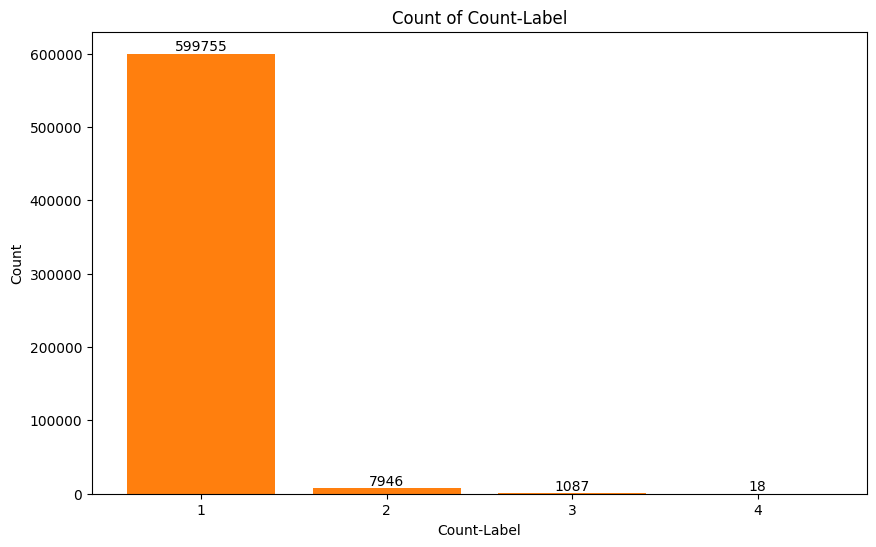

In [5]:
count_df = df_capec['count-label'].value_counts().reset_index()
count_df.columns = ['count-label', 'count']
print(count_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Define the size of the plot
plt.bar(count_df['count-label'], count_df['count'])
bars = plt.bar(count_df['count-label'], count_df['count'])
plt.xlabel('Count-Label')
plt.ylabel('Count')
plt.title('Count of Count-Label')
plt.xticks(count_df['count-label'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)), ha='center', va='bottom')

plt.show()

In [6]:
multilabel_df = df_capec[df_capec['count-label'] > 0]
# Reset the index of the new DataFrame
multilabel_df = multilabel_df.reset_index(drop=True)
multilabel_df.head()

,000 - Normal,272 - Protocol Manipulation,242 - Code Injection,88 - OS Command Injection,126 - Path Traversal,66 - SQL Injection,16 - Dictionary-based Password Attack,310 - Scanning for Vulnerable Software,153 - Input Data Manipulation,248 - Command Injection,274 - HTTP Verb Tampering,194 - Fake the Source of Data,34 - HTTP Response Splitting,33 - HTTP Request Smuggling,count-label,text
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,GET /blog/index.php/2020/04/04/voluptatum-repr...
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,GET /blog/xmlrpc.php?rsd
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,GET /blog/index.php/2020/04/04/nihil-tenetur-e...
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,GET /blog/index.php/2020/04/04/explicabo-qui-f...
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,GET /blog/index.php/2020/04/04/explicabo-qui-f...


In [7]:
label_columns = [
    '000 - Normal',
    '272 - Protocol Manipulation',
    '242 - Code Injection',
    '88 - OS Command Injection',
    '126 - Path Traversal',
    '66 - SQL Injection',
    '16 - Dictionary-based Password Attack',
    '310 - Scanning for Vulnerable Software',
    '153 - Input Data Manipulation',
    '248 - Command Injection',
    '274 - HTTP Verb Tampering',
    '194 - Fake the Source of Data',
    '34 - HTTP Response Splitting',
    '33 - HTTP Request Smuggling'
]
df = multilabel_df
data_multilabel = {'httprequest': [], 'label': []}
for index, row in df.iterrows():
    textRow = row["text"]
    labels = []  # Create a list to store column names with cell value == 1
    for column in df.columns:
        cell_value = row[column]
        if column in label_columns and cell_value == 1 :
            data_multilabel['httprequest'].append(textRow)
            data_multilabel['label'].append(column)
df_multilabel  =pd.DataFrame(data_multilabel)
df_multilabel.head()

,httprequest,label
0,GET /blog/index.php/2020/04/04/voluptatum-repr...,000 - Normal
1,GET /blog/xmlrpc.php?rsd,000 - Normal
2,GET /blog/index.php/2020/04/04/nihil-tenetur-e...,000 - Normal
3,GET /blog/index.php/2020/04/04/explicabo-qui-f...,000 - Normal
4,GET /blog/index.php/2020/04/04/explicabo-qui-f...,000 - Normal


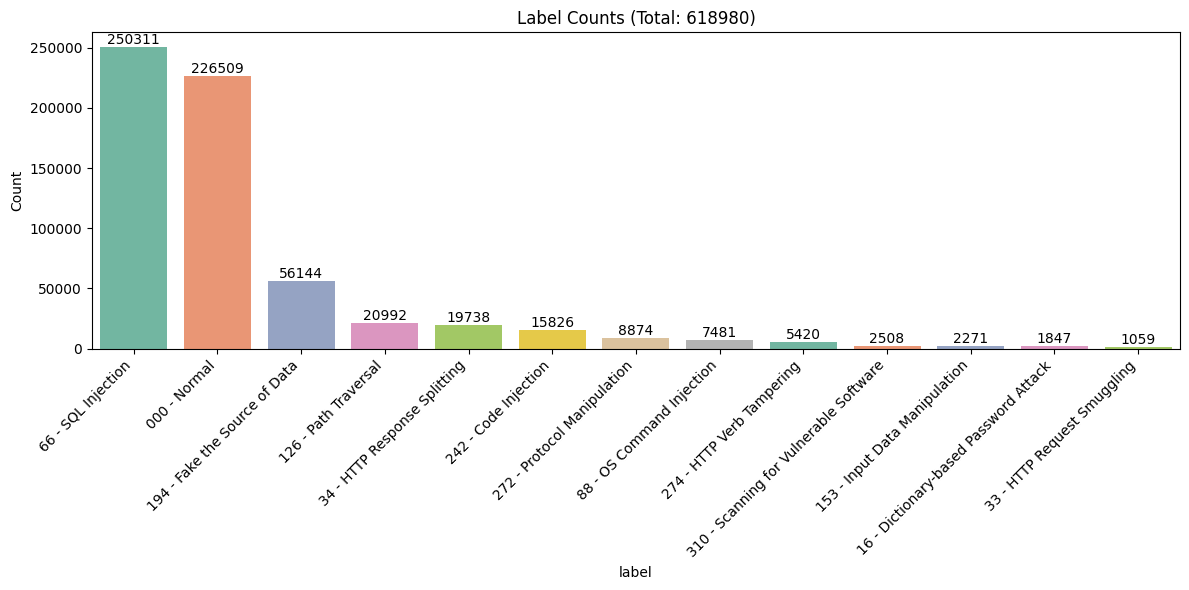

In [8]:

# Assuming 'df' is your DataFrame with the "label" column
# Create a count of labels and their occurrences
label_counts = df_multilabel['label'].value_counts()

# Create a color palette for the bars
colors = sns.color_palette("Set2", len(label_counts))

# Create a bar chart with specified colors
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)

# Add labels to the bars
for i, (label, count) in enumerate(label_counts.items()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Customize the chart
total_count = label_counts.sum()
plt.title(f'Label Counts (Total: {total_count})')
plt.ylabel('Count')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Show the chart
plt.tight_layout()
plt.show()


In [9]:
df_multilabel.to_csv('dataset_capec_multilabel_all.csv', encoding='utf-8', index=False)